In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('dataframe/champions.csv')  
df.head(5)  

,idPartido,Temporada,Ronda,Local,Visitante,Evento,Arbitro,GolesLocal,GolesVisitante,VictoriaLocal,...,1_MediaJugadores,%_2_G_Temporada,%_2_G_Temporada_L,%_2_E_Temporada_L,%_2_P_Temporada_L,2_Media_G,2_Media_G_Local,2_Media_Goles_PP,2_ValorJugadores,2_MediaJugadores
0,1,2022-01-01,Group stage,235,11,Stadion Maksimir,István Kovács,1,0,1,...,18.743616,40.00,60.00,20.00,20.00,0.40,0.60,1.60,685.188968,26.353422
1,2,2022-01-01,Group stage,14,153,Signal Iduna Park,François Letexier,3,0,1,...,19.853461,0.00,0.00,100.00,0.00,0.00,0.00,0.33,356.128703,14.245148
2,3,2022-01-01,Group stage,15,1,Celtic Park,Sandro Schärer,0,3,0,...,18.490575,50.00,83.33,16.67,0.00,0.50,0.83,2.17,796.271706,36.194168
3,4,2022-01-01,Group stage,10,298,Estádio do Sport Lisboa e Benfica,Andreas Ekberg,2,0,1,...,28.153728,0.00,33.33,0.00,66.67,0.00,0.33,1.33,382.737487,19.136874
4,5,2022-01-01,Group stage,184,2,Red Bull Arena,Srđan Jovanović,1,1,0,...,19.353798,16.67,66.67,0.00,33.33,0.17,0.67,1.50,749.233912,32.575387


In [4]:
# Eliminar la columna 'Temporada' y 'Ronda' ya que son categóricas y no se pueden convertir directamente a flotante
df = df.drop(columns=['Temporada', 'Ronda', 'Evento', 'Arbitro'])

In [5]:
numeric_features = ['GolesLocal', 'GolesVisitante', '%_Victorias_Local', '%_Empate', '%_Victoria_Visitante',
                    '1_Media_G', '1_Media_G_Local', '1_Media_Goles_PP', '1_ValorJugadores', '1_MediaJugadores',
                    '2_Media_G', '2_Media_G_Local', '2_Media_Goles_PP', '2_ValorJugadores', '2_MediaJugadores']


stats = df[numeric_features].describe()
print(stats)

        GolesLocal  GolesVisitante  %_Victorias_Local     %_Empate  \
count  2494.000000     2494.000000         2494.00000  2494.000000   
mean      1.609463        1.202085           47.55421    22.373761   
std       1.422643        1.238205           26.34099    24.797913   
min       0.000000        0.000000            0.00000     0.000000   
25%       1.000000        0.000000           38.12500     0.000000   
50%       1.000000        1.000000           50.00000    16.670000   
75%       2.000000        2.000000           50.00000    50.000000   
max       8.000000        8.000000          100.00000   100.000000   

       %_Victoria_Visitante    1_Media_G  1_Media_G_Local  1_Media_Goles_PP  \
count           2494.000000  2494.000000      2494.000000       2494.000000   
mean              30.072113     0.388621         0.475092          1.609535   
std               25.016135     0.213687         0.281768          0.818652   
min                0.000000     0.000000         0.00

En promedio, se marcan más goles en casa (1.61 goles) que fuera (1.20 goles). Sin embargo, la diferencia no es significativa. El porcentaje promedio de victorias en casa es del 47.55%, mientras que el porcentaje promedio de victorias como visitante es del 30.07%. Esto sugiere que los equipos tienen una ligera ventaja al jugar en casa. El porcentaje promedio de empates es del 22.37%. Esto indica que aproximadamente una de cada cinco partidos termina en empate.

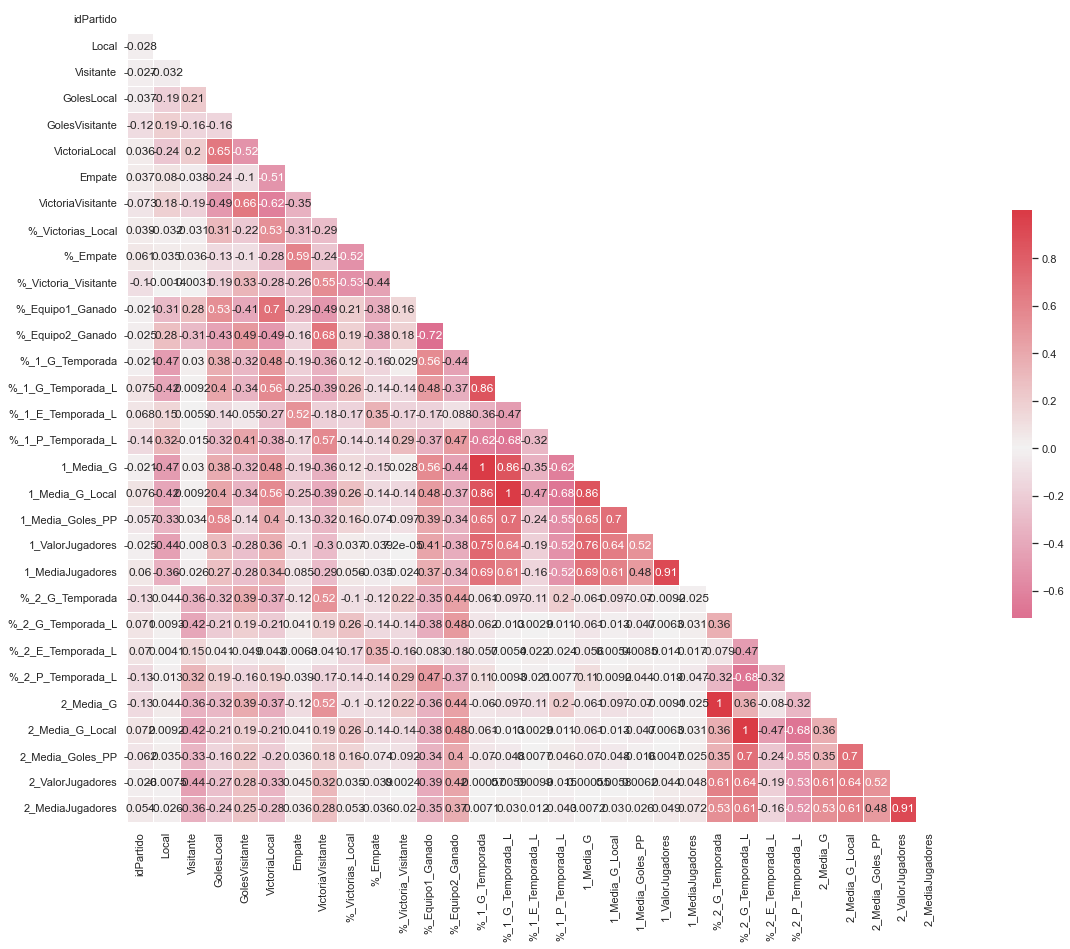

In [6]:
# Seleccionar solo las columnas numéricas
columnas_numericas = df.select_dtypes(include='number')

# Calcular la matriz de correlación
matriz_correlacion = columnas_numericas.corr()

# Crear el mapa de calor
plt.figure(figsize=(25, 15))
sns.set(style='white')

mask = np.triu(np.ones_like(matriz_correlacion, dtype=bool))
cmap = sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(matriz_correlacion,
            mask=mask,
            cmap=cmap,
            center=0,
            square=True,
            annot=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.5})

plt.show()

In [7]:
# Separar características y etiquetas
X = df.drop(columns=['GolesLocal'])  # Características
y = df['GolesLocal']  # Etiqueta para la victoria del local

In [8]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 1745 rows
Test Set: 749 rows


In [9]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print(model)

LinearRegression()


In [10]:
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [3. 1. 2. 2. 1. 2. 0. 0. 1. 1.]
Actual labels   :  720     5
1109    1
2000    4
2394    2
2005    1
195     2
2465    1
1450    0
1091    0
2451    1
Name: GolesLocal, dtype: int64


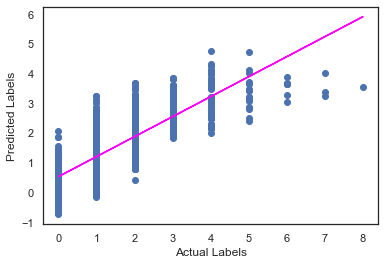

In [11]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [12]:
#Evaluación del modelo
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 0.7048822065757392
RMSE: 0.8395726332937128
R2: 0.6395848050442168


#### Lasso algorithm

Lasso() 

MSE: 1.2554930495016687
RMSE: 1.120487862273246
R2: 0.35805051116274134


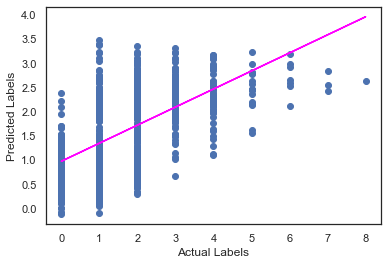

In [13]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

- El modelo de regresión lineal tiene un MSE y RMSE más bajos, lo que indica que tiene un mejor rendimiento en términos de precisión de la predicción en comparación con el modelo Lasso.

- El modelo Lasso tiene un valor de R2 más bajo en comparación con el modelo de regresión lineal, lo que indica que explica menos la variabilidad de los datos observados. Esto podría deberse a la penalización L1 en Lasso, que puede eliminar características menos importantes, lo que conduce a un modelo más simple pero posiblemente menos explicativo.

#### Árboles de decisión

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_4 <= 0.50
|   |--- feature_3 <= 0.50
|   |   |--- feature_5 <= 0.50
|   |   |   |--- value: [1.00]
|   |   |--- feature_5 >  0.50
|   |   |   |--- value: [0.00]
|   |--- feature_3 >  0.50
|   |   |--- feature_5 <= 0.50
|   |   |   |--- feature_3 <= 1.50
|   |   |   |   |--- feature_17 <= 0.81
|   |   |   |   |   |--- feature_20 <= 36.37
|   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |--- feature_20 >  36.37
|   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |--- feature_17 >  0.81
|   |   |   |   |   |--- feature_1 <= 12.00
|   |   |   |   |   |   |--- feature_17 <= 0.84
|   |   |   |   |   |   |   |--- value: [2.00]
|   |   |   |   |   |   |--- feature_17 >  0.84
|   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |--- feature_1 >  12.00
|   |   |   |   |   |   |--- value: [0.00]
|   |   |   |--- feature_3 >  1.50
|   |   |   |   |--- feature_18 <= 1.63
|   |   |   |   |   |--- feature_18 <= 0.93
|   |   |  

 Cada nodo evalúa una característica del conjunto de datos y, dependiendo del valor de esa característica, el árbol sigue una rama específica hasta llegar a un nodo final donde se hace una predicción sobre el número de goles. Ahora voy a evaluar este modelo.

MSE: 1.3511348464619493
RMSE: 1.1623832614340028
R2: 0.30914764969767883


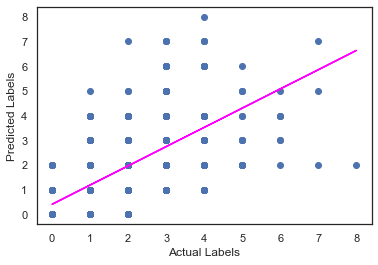

In [15]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Gráfica predecida vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

#linea de regresión
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

El modelo basado en árboles no parece haber mejorado con respecto al modelo lineal, tiene un margen de mejora especialmente en términos de reducir el error y mejorar la capacidad del modelo para explicar la variabilidad en los datos de destino ya que en estos momentos es de un 32%.

### Ensemble Algorithm

En lugar de depender de un solo modelo,  los algoritmos de conjunto utilizan la idea de que la combinación de múltiples modelos puede producir predicciones más precisas y robustas que cualquier modelo individual. Voy a entrenar un modelo de regresión utilizando el algoritmo Random Forest Regressor y Gradient Boosting.

RandomForestRegressor() 

MSE: 0.6435234979973298
RMSE: 0.8021991635481365
R2: 0.6709582894480202


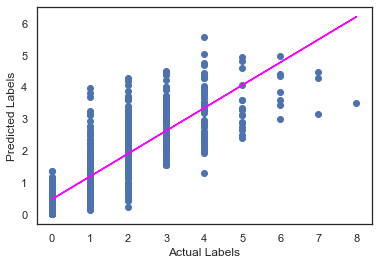

In [16]:
from sklearn.ensemble import RandomForestRegressor

#Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

GradientBoostingRegressor() 



MSE: 0.6453640273605057
RMSE: 0.8033455217778374
R2: 0.6700172034863339


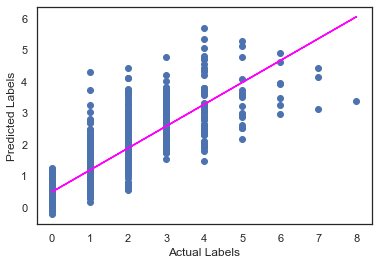

In [18]:
#Evaluación del modelo
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Gráfica predecida vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

El modelo de ensemble (Gradient Boosting en este caso) muestra el mejor rendimiento en términos de MSE, RMSE y R2 en comparación con los otros modelos.

El modelo Lasso parece tener el peor rendimiento, lo que indica que no explica tan bien la variabilidad de los datos.

El árbol de decisión tiene un rendimiento similar al Lasso, aunque ligeramente mejor, pero aún así es superado por la regresión lineal y el ensemble algorithm en términos de métricas de evaluación.

El ensemble algorithm muestra un rendimiento bastante bueno, con el MSE más bajo y un R2 alto en comparación con los otros modelos, lo que sugiere que puede ser una opción sólida para hacer predicciones precisas.

#### Optimización con hiperparámetros para GradientBosoting

A continuación vamos a probar la técnica de ajuste de hiperparámetros buscando la mejor combinación de estos para el estimador GradientBoostingRegressor utilizando la métrica de puntuación R2 a través de la técnica de búsqueda en cuadrícula.

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

#Agregamos el modelo a una variable
alg = GradientBoostingRegressor()

#El diccionario params especifica una cuadrícula de combinaciones de hiperparámetros que se probarán durante la búsqueda en cuadrícula para encontrar la mejor combinación
#learning_rate contribución de cada árbol en el conjunto, n_estimators número de árboles de decisión que se utilizarán en el ensamble
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

#Utilizaremos GridSearchCV para realizar una búsqueda exhaustiva sobre una cuadrícula de valores de hiperparámetros, con el objetivo de encontrar la combinación de hiperparámetros que maximice una métrica de evaluación específica. En este caso, la métrica de evaluación utilizada es el coeficiente de determinación R2.
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Mejor combinacion de parametros:", gridsearch.best_params_)

Mejor combinacion de parametros: {'learning_rate': 0.1, 'n_estimators': 50}


In [20]:
#Mejor modelo encontrado en la búsqueda
model=gridsearch.best_estimator_
print(model)

GradientBoostingRegressor(n_estimators=50)


In [21]:
#Evaluación del modelo
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 0.6322729169979764
RMSE: 0.7951559073527508
R2: 0.676710853928185


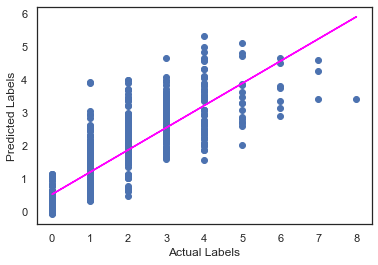

In [22]:
#Gráfica predicha vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

En este caso la evaluación no mejora significativamente.

## Preprocesamiento de datos

A continuación, vamos a entrenar un modelo de regresión utilizando un pipeline en el que se aplican diferentes transformaciones a las características de los datos antes de ajustar el modelo:

- Escalado de características numéricas: Normalizar características numéricas para que estén en la misma escala. Esto evita que las características con valores grandes produzcan coeficientes que afecten desproporcionadamente las predicciones del modelo.

- Codificación de variables categóricas: Convertir características categóricas en representaciones numéricas. Esto se realiza porque la mayoría de los modelos de aprendizaje automático funcionan mejor con características numéricas en lugar de valores de texto.

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression

# Seleccionar las características numéricas a escalar
numeric_features = ['%_Victorias_Local', '%_Empate', '%_Victoria_Visitante', '%_Equipo1_Ganado',
                    '%_Equipo2_Ganado', '%_1_G_Temporada', '%_1_G_Temporada_L', '%_1_E_Temporada_L', 
                    '%_1_P_Temporada_L', '1_Media_G', '1_Media_G_Local', '1_Media_Goles_PP', 
                    '1_ValorJugadores', '1_MediaJugadores', '%_2_G_Temporada', '%_2_G_Temporada_L', 
                    '%_2_E_Temporada_L', '%_2_P_Temporada_L', '2_Media_G', '2_Media_G_Local', 
                    '2_Media_Goles_PP', '2_ValorJugadores', '2_MediaJugadores']

#Definir el preprocesador como un Pipeline
preprocessor = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Crear un Pipeline completo con el preprocesador y el modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

# Entrenar el Pipeline
model = pipeline.fit(X_train, y_train)

# Hacer predicciones
predictions = pipeline.predict(X_test)


MSE: 0.6446977794568887
RMSE: 0.8029307438732737
R2: 0.6703578644731356


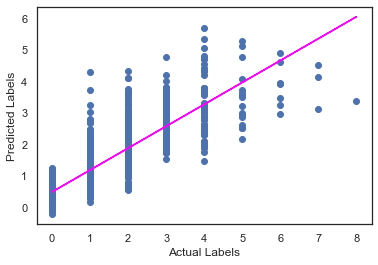

In [24]:
#Evaluación
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

#Gráfico predicho vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler())])),
                ('regressor', RandomForestRegressor())]) 

MSE: 0.6523974632843792
RMSE: 0.8077112499429355
R2: 0.6664209186658865


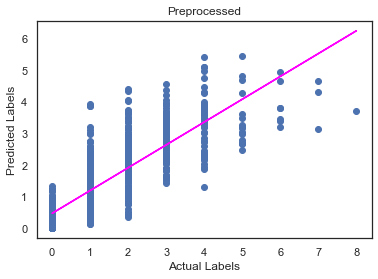

In [25]:
# Use a different estimator in the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model, "\n")

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

En mi caso normalizar los datos no afecta a mi modelo boost gradient, pero si mejora el modelo de random forest. Evaluando todos los modelos podemos ver que los mejores valores valores lo tiene el modelo gradient boosting ajustado con hiperparametros, en concreto con 50 estimadores. 

Voy a hacer una última prueba normalizando los datos mediante el logaritmo para ver si mejoraría los modelos, ya que algunos valores estén sesgados o tengan valores atípicos.

La estandarización de las características mediante el pipeline que hemos hecho anteriormente implica transformarlas de modo que tengan una media de cero y una desviación estándar de uno. Esto se logra restando la media de cada característica y dividiendo por su desviación estándar. Por otro lado, la transformación logarítmica, como np.log1p, se utiliza para modificar la distribución de las características, especialmente si están sesgadas o si varían en órdenes de magnitud. 

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pickle

#Normalizamos los datos de entrenamiento y los guardamos en un fichero para su uso futuro
pt = PowerTransformer()
pt.fit(X_train)
#with open('/Users/carlotasanchezgonzalez/Desktop/regresion1 copia/scalers/octavos_scaler.pkl', 'wb') as f:
    #pickle.dump(pt, f)

#Normalizamos los datos para que se asemeje a una distribución normal y así mejorar el rendimiento del modelo
x_train_scaled = pt.transform(X_train)
x_test_scaled = pt.transform(X_test)

y_train_scaled = np.log1p(y_train)

#Y lo guardamos en dataframes
x_train_scaled = pd.DataFrame(x_train_scaled, columns=X.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=X.columns)

x_train_scaled


AttributeError: module 'numpy' has no attribute 'warnings'